# Στειροπούλου Ευαγγελία 
### Α.Μ. 111520180016
## Εργασία 2η Αναγνώριση Προτύπων - Μηχανική Μάθηση



# Face recognition: 

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import glob
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## I: loadImages function

In [100]:
def loadImages(path, set_number):
    image_paths = glob.glob(path + "/person*_*.png")

    image_matrix = []
    labels = []
    for path in image_paths:
        filename = path.split('/')[-1]
        person_id = int(filename.split('_')[0][6:])
        image_number = int(filename.split('_')[1].split('.')[0])

        if ((set_number == "Set_1" and 1 <= image_number <= 7) or
            (set_number == "Set_2" and 8 <= image_number <= 19) or
            (set_number == "Set_3" and 20 <= image_number <= 31) or
            (set_number == "Set_4" and 32 <= image_number <= 45) or
            (set_number == "Set_5" and 46 <= image_number <= 64)):

            image_array = np.array(plt.imread(path).flatten())
            image_matrix.append(image_array)
            labels.append(person_id)
    
    return np.array(image_matrix), labels


Όπως αναφέρεται στην εκφώνηση, η προεπεξεργασία της εικόνας είναι απαραραίτητη, και γίνεται με την αφαίρεση της μέσης τιμής της και στην συνέχεια με την διαίρεση με την τυπική απόκλιση των τιμών της.

In [101]:
def normalization(faces):
    X = np.ndarray(shape=faces.shape)  # Normalized data matrix
    for i in range(faces.shape[0]):
        X[i] = (faces[i] - np.mean(faces, axis=0)) / np.std(faces, axis=0)
    return X

## II: Train Eigenfaces method

Dimension: 9
Confusion matrix


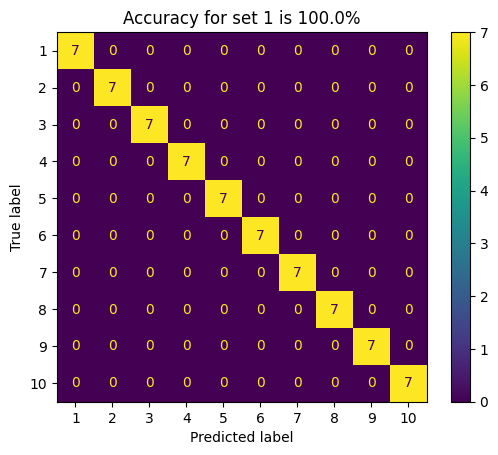

Confusion matrix


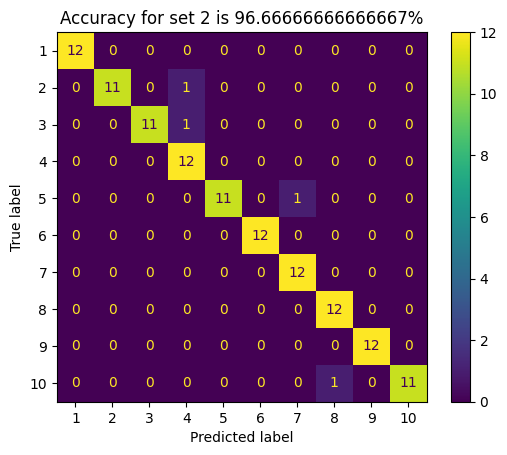

Confusion matrix


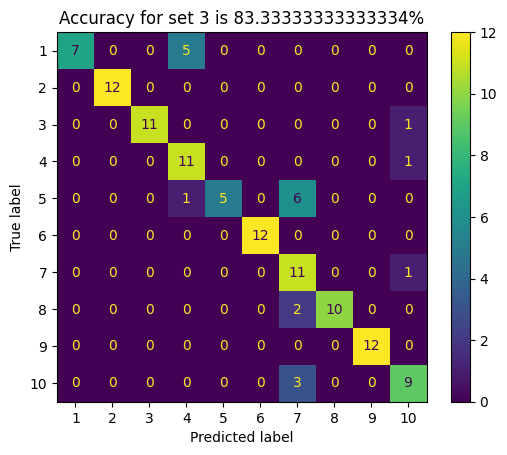

Confusion matrix


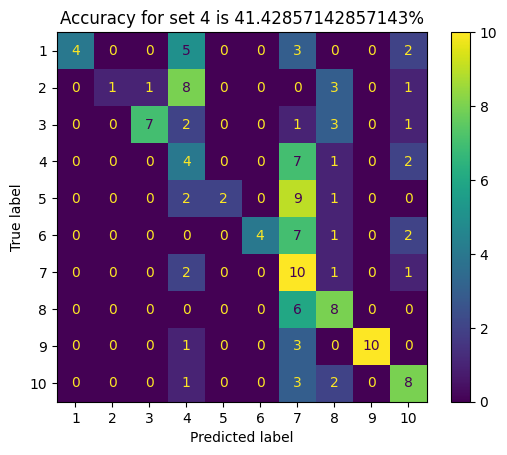

Confusion matrix


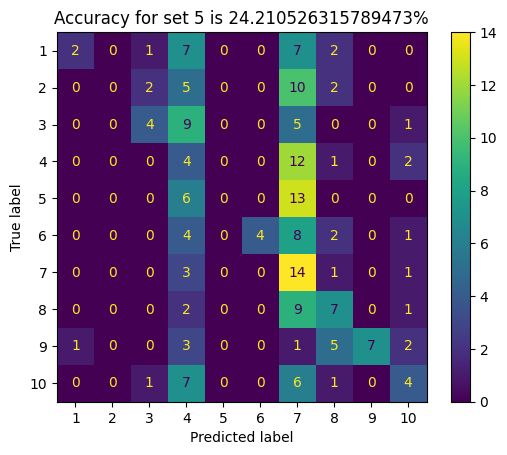

Dimension: 30
Confusion matrix


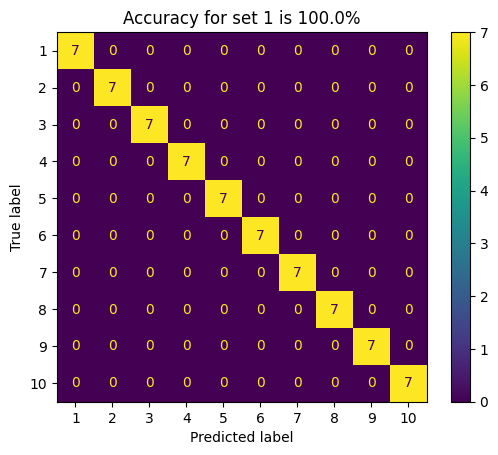

Confusion matrix


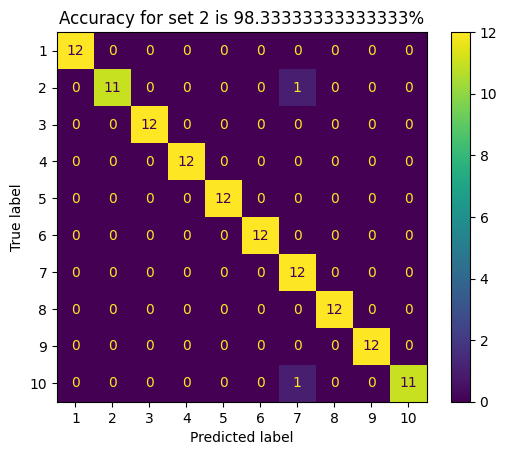

Confusion matrix


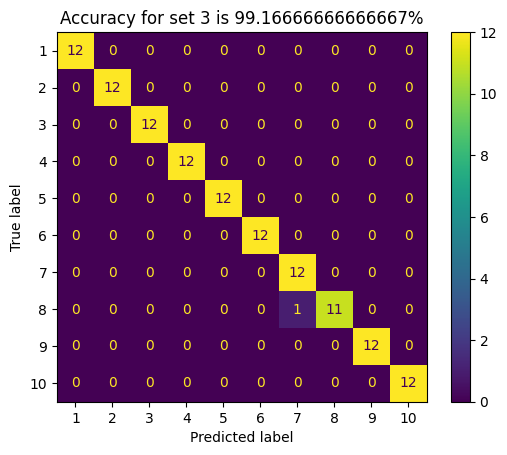

Confusion matrix


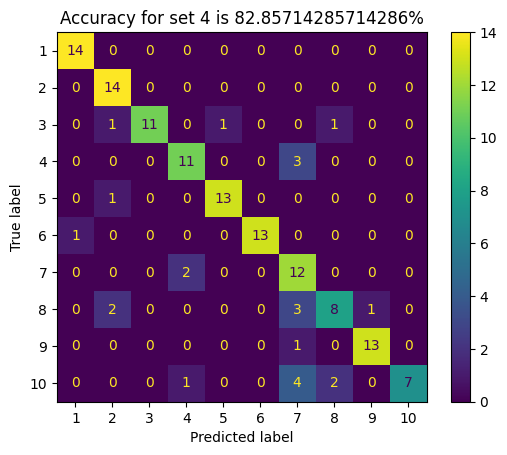

Confusion matrix


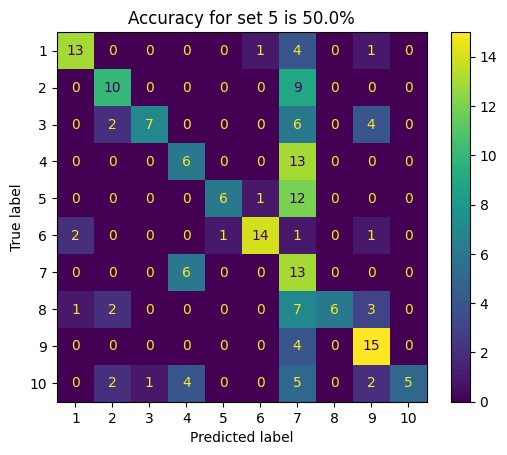

In [102]:
X_set1, y_set1 = loadImages("/home/eva/Documents/machine_learning/project2/faces", "Set_1")
   
X_train_set = normalization(X_set1) #Train the model with the first set of images

#for dimensions 9 and 30
dimensions = [9, 30]
#create a dictionary to store the results of the accuracy for every set of images
accuracy = {}
for d in dimensions:
    print("Dimension: " + str(d))
    pca = PCA(n_components=d, whiten=True) #Apply PCA
    X_train_pca = pca.fit_transform(X_train_set) #Fit the model using the initial training set(set 1)
    knn = KNeighborsClassifier(n_neighbors=1).fit(X_train_pca, y_set1)  #Train the model
    for set_number in range(1,6):
        #Test the model, for every set of images
        X_set, y_set = loadImages("/home/eva/Documents/machine_learning/project2/faces", "Set_" + str(set_number))
        X_test_set = normalization(X_set)
        X_test_set = pca.transform(X_test_set)
        y_pred = knn.predict(X_test_set)
        accuracy[str(set_number)] = accuracy_score(y_set, y_pred)*100
        #print("Accuracy for dimension " + str(d) + " is: " + str(accuracy))

        #Plot the confusion matrix for the set of images
        cm = confusion_matrix(y_set, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_set))
        disp.plot()
        print("Confusion matrix")
        plt.title("Accuracy for set " + str(set_number) + " is " + str(accuracy[str(set_number)]) + "%")
        plt.show()

Παρατηρώ ότι για d = 30, η ακρίβεια ταξινόμησης είναι υψηλότερη για τα υπόλοιπα sets****************************. 

## III: 9 top eigenvectors

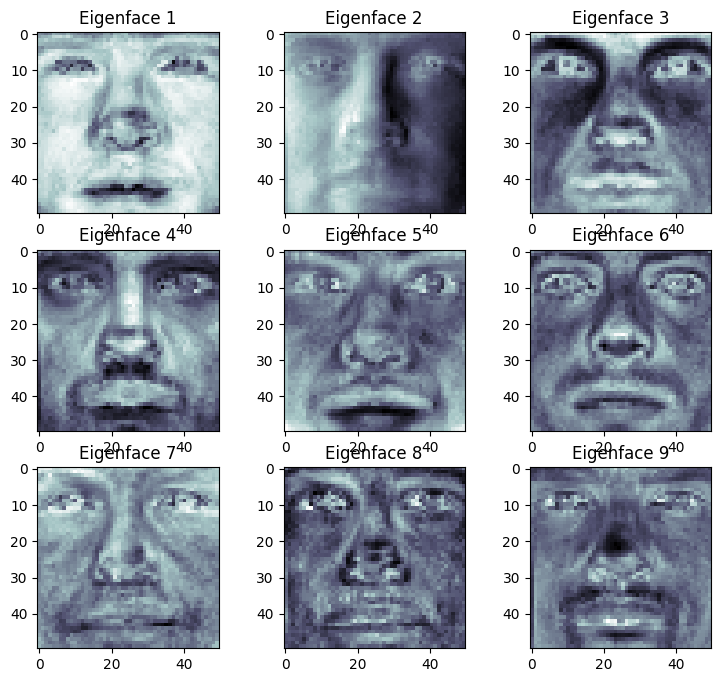

In [111]:
#plot the top 9 eigenfaces
plt.figure(figsize=(9, 8))
for i in range(9):  
    plt.subplot(3, 3, i + 1)
    eigenfaces = pca.components_[i].reshape(50,50)
    plt.title("Eigenface " + str(i+1))
    plt.imshow(eigenfaces, cmap='bone')
plt.show()


## IV: Recreate images

In [ ]:
for d in dimensions:
    #print("Dimension: " + str(d))
    